# Example 1

This is a jupyter notebook example of how to plot fraction folded vs time plots from raw kinetics data

In [4]:
from pathlib import Path
import sys
from matplotlib import pyplot as plt

In [6]:
# replace the path with where you have put the gelkineticsfit folder

root_dir = Path("/Users/samuelhaysom/Library/CloudStorage/OneDrive-UniversityofLeeds/PhD Mechanistic Biology (2018-22)/Computing/BAM_folding_fitting/gelkineticsfit/")
sys.path.append(str(root_dir))
from gelkineticsfit import parse, plots, calcs

Paths to raw data

In [7]:
data_dir = "gelkineticsfit/examples"
OmpX_file = "DAR-B_Folding_OmpX.xlsx"
tOmpA_file = "DAR-B_Folding_tOmpA.xlsx"

# Processing
1. Parse the raw data
2. For each condition (delineated by sheet in the raw data), calculates average fraction folded at each time point
3. Fit the average fraction folded data with a single exponential decay function

In [8]:
OmpX_data_dict = parse.parse_raw_kinetics_xlsx(OmpX_file)
OmpX_avdata_dict = calcs.av_by_cond_in_data_dict(OmpX_data_dict)
OmpX_avfitting_dict = calcs.get_fit_params_dict_from_avdata_dict(OmpX_avdata_dict)

Processing condition WT BAM (new)
Processing condition WT BAM + DAR-B
Processing condition WT BAM + 1% DMSO
Processing condition WT BAM + 1% DMSO (new)
Condition: WT BAM (new)
WT BAM (new): 
k: 1.05E-03 y0: 1.00E-06 plateau: 0.7855955910826243
pcov: [[ 3.43829250e-09 -4.53864302e-07 -3.34031713e-07]
 [-4.53864302e-07  2.01770564e-04  2.26206332e-05]
 [-3.34031713e-07  2.26206332e-05  9.26440330e-05]]

Condition: WT BAM + DAR-B
WT BAM + DAR-B: 
k: 5.54E-06 y0: -1.00E-06 plateau: 0.9999999999999998
pcov: [[ 1.31902882e-09 -3.54612021e-08 -2.31880065e-04]
 [-3.54612021e-08  2.91560008e-06  6.18079783e-03]
 [-2.31880065e-04  6.18079783e-03  4.07667997e+01]]

Condition: WT BAM + 1% DMSO
WT BAM + 1% DMSO: 
k: 2.27E-04 y0: -1.00E-06 plateau: 0.6510979216672363
pcov: [[ 5.09349988e-10 -1.19775296e-07 -5.90000865e-07]
 [-1.19775296e-07  9.77078626e-05  9.90399001e-05]
 [-5.90000865e-07  9.90399001e-05  8.17885213e-04]]

Condition: WT BAM + 1% DMSO (new)
WT BAM + 1% DMSO (new): 
k: 8.40E-04 y0: 

In [9]:
tOmpA_data_dict = parse.parse_raw_kinetics_xlsx(tOmpA_file)
tOmpA_avdata_dict = calcs.av_by_cond_in_data_dict(tOmpA_data_dict)
tOmpA_avfitting_dict = calcs.get_fit_params_dict_from_avdata_dict(tOmpA_avdata_dict)

Processing condition WT BAM (new)
Processing condition WT BAM + DAR-B
Processing condition WT BAM + 1% DMSO
Processing condition WT BAM + 1% DMSO (new)
Processing condition WT BAM (James)
Condition: WT BAM (new)
WT BAM (new): 
k: 2.23E-03 y0: 1.00E-06 plateau: 0.9009737023175453
pcov: [[ 5.66247723e-08 -4.56615448e-06 -1.76999634e-06]
 [-4.56615448e-06  1.25288398e-03  6.10378196e-05]
 [-1.76999634e-06  6.10378196e-05  2.77192540e-04]]

Condition: WT BAM + DAR-B
WT BAM + DAR-B: 
k: 3.18E-05 y0: -1.00E-06 plateau: 0.9999999999998357
pcov: [[ 1.70373936e-09 -2.28485907e-07 -4.60276873e-05]
 [-2.28485907e-07  9.54549706e-05  5.87769377e-03]
 [-4.60276873e-05  5.87769377e-03  1.24690471e+00]]

Condition: WT BAM + 1% DMSO
WT BAM + 1% DMSO: 
k: 4.60E-04 y0: 1.00E-06 plateau: 0.8441224924547627
pcov: [[ 3.14691508e-10 -7.78347781e-08 -1.38854928e-07]
 [-7.78347781e-08  6.88409344e-05  1.98353068e-05]
 [-1.38854928e-07  1.98353068e-05  1.04089248e-04]]

Condition: WT BAM + 1% DMSO (new)
WT BAM

# Plotting

1. Specify colours to use for each condition. These can be anything recognised by matplotlib e.g. values in matplotlib colour table or hexadecimal codes


In [10]:
# Colours
colours_dict = {
    "WT BAM + 1% DMSO" : plt.cm.tab20(5), # lightgreen
    "WT BAM + DAR-B" : plt.cm.tab20(1), # lightblue
    # BAM-Fab paper colours
    "WT BAM" : '#000000ff', # black
    "BAM-Fab1" : '#ff0000ff', # red
    "BAM-P5L" : '#009900fe', # green
    "BAM-P5L + DTT" : '#d4aa00ff', # yellow
    "BAM-LL" : '#0000ffff', # blue
    "BAM-LL + DTT" : '#ff40d9ff', # BAM-LL + DTT
    "BamA" : '#9039e6d5', # purple
    "empty liposomes" : '#777777fa' # grey
}

#['#000000ff', '#ff0000ff', '#009900fe', '#d4aa00ff', '#0000ffff', '#ff40d9ff', '#9039e6d5', '#777777fa']

2. Specify fonts for plotting

In [11]:
font = {
        'family' : 'Arial',
        'weight' : 'normal',
        'size' : 7.560
        }
plt.rc('font', **font)

3. Plot the data. Dictionary and list comprehensions are used to filter the data before plotting. 
https://www.datacamp.com/community/tutorials/python-dictionary-comprehension
https://www.w3schools.com/python/python_lists_comprehension.asp

Saving as WTdmsoVSWTDAR-B_tOmpA_curves.png


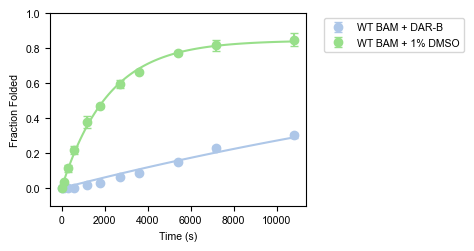

In [14]:
# Figure 1a
plot_list = ["WT BAM + DAR-B", "WT BAM + 1% DMSO"]

plot_avdata = {cond:tOmpA_avdata_dict[cond] for cond in plot_list}
plot_avfitting = {cond:tOmpA_avfitting_dict[cond] for cond in plot_list}
colours = [colours_dict[cond] for cond in plot_list]

plots.plot_avdata_avfitting_as_scatter(
    plot_avdata, plot_avfitting,
    y_limits=[-0.1,1],
    fig_size=[3.1, 2.390],
    error_bars="range", 
    colors=colours,
    save="WTdmsoVSWTDAR-B_tOmpA_curves.png",
    tight_layout=False
)

Saving as WTdmsoVSWTDAR-B_OmpX_curves.png


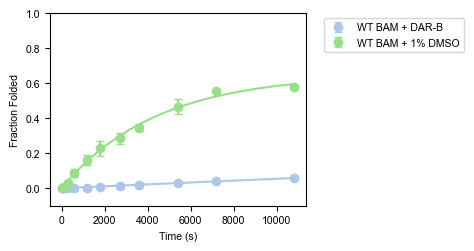

In [13]:
# Figure 1b
plot_list = ["WT BAM + DAR-B", "WT BAM + 1% DMSO"]

plot_avdata = {cond:OmpX_avdata_dict[cond] for cond in plot_list}
plot_avfitting = {cond:OmpX_avfitting_dict[cond] for cond in plot_list}
colours = [colours_dict[cond] for cond in plot_list]

plots.plot_avdata_avfitting_as_scatter(
    plot_avdata, plot_avfitting,
    y_limits=[-0.1,1],
    fig_size=[3.1, 2.390],
    error_bars="range", 
    colors=colours,
    save="WTdmsoVSWTDAR-B_OmpX_curves.png",
    tight_layout=False
)